# Matplotlib

## Intro

Matplotlib는 Python 프로그래밍 언어 및 수학적 확장 NumPy 라이브러리를 활용한 플로팅 라이브러리입니다. 그래프 제작에 사용되는 low level 라이브러리입니다.

## Practice

In [ ]:
# # Colab에서 실습하는 경우
# !wget https://github.com/dlacksthd94/woori-practice-session/raw/main/data.zip
# !unzip data.zip

### Library

In [147]:
!pip install scipy
!pip install sklearn
!pip install wordcloud
!pip install matplotlib_venn
!pip install squarify
!pip install soynlp

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib_venn as venn
import squarify
from sklearn import preprocessing
from scipy import stats
from matplotlib import font_manager, rc
from wordcloud import WordCloud
from soynlp.noun import LRNounExtractor_v2

### Set Font

In [2]:
# Windows
'''
font_path = "C:/Windows/Fonts/malgun.ttf" # any font you want
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
'''
# MacOS

rc('font', family='AppleGothic')
font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf' # run code to find path : [f.fname for f in font_manager.fontManager.ttflist if 'AppleGothic' in f.name]
plt.rcParams['axes.unicode_minus'] = False


### Load Data

In [3]:
FOLDER = '실습 데이터/'
df = pd.read_pickle(FOLDER + 'df_movie_basic_clean.pickle')
df_hotel = pd.read_pickle(FOLDER + 'df_hotel_clean.pickle')
df_comment = pd.read_pickle(FOLDER + 'df_comment_clean.pickle')

In [4]:
df.head()

,id_movie,title_kor,title_eng,score_audience,score_critic,score_netizen,genre,nation,run_time,day_opening
0,191613,클라우스,Klaus,<NA>,<NA>,9.81,"[애니메이션, 코미디, 가족]","[스페인, 영국]",96,2019-11-15
1,171539,그린 북,Green Book,9.55,7.29,9.6,[드라마],[미국],130,2019-01-09
2,213746,장민호 드라마 최종회,,9.89,<NA>,9.59,[공연실황],[한국],106,2022-01-24
3,174830,가버나움,"Capharnaum, Capernaum",9.54,7.33,9.59,[드라마],"[레바논, 프랑스]",126,2019-01-24
4,186114,밥정,The Wandering Chef,9.7,7.0,9.56,"[다큐멘터리, 드라마]",[한국],82,2020-10-07


In [5]:
df_hotel.head()

,id,name,star,score,phone,address,price_total,price_package,facilities,rating_hc,rating_ta,rating_bk
0,0,그랜드 워커힐 서울,5,NaN,1670-0005,서울 광진구 워커힐로 177 그랜드워커힐 서울,129545,<NA>,"[무료 와이파이, 와이파이, 공항 셔틀 제공, 무료 주차 가능, 주차장, 24시간 ...",8.4,9.0,8.3
1,1,콘래드 서울 호텔,5,NaN,02-6137-7000,서울 영등포구 국제금융로 10 서울 국제금융 센터,293278,<NA>,"[와이파이, 고속 인터넷, 공항 셔틀 제공, 주차장, 발렛 파킹, 24시간 리셉션,...",8.5,9.0,8.5
2,2,서울신라호텔,5,NaN,02-2233-3131,서울 중구 동호로 249,375977,476000,"[와이파이, 공항 셔틀 제공, 무료 주차 가능, 주차장, 24시간 리셉션, 룸 서비...",9.0,9.0,9.0
3,3,JW 메리어트 호텔 서울,5,NaN,02-6282-6262,서울 서초구 신반포로 176 JW 메리어트 호텔 서울,300000,<NA>,"[무료 와이파이, 와이파이, 고속 인터넷, 공항 셔틀 제공, 주차장, 발렛 파킹, ...",8.7,10.0,8.8
4,4,그랜드 하얏트 서울,5,NaN,02-797-1234,서울 용산구 소월로 322,243000,427091,"[무료 와이파이, 와이파이, 주차장, 발렛 파킹, 24시간 리셉션, 룸 서비스, 컨...",8.0,8.0,8.0


In [6]:
df_comment.head()

,id_movie,score,comment
0,191613,10,이 영화 완내스!!! 박박!! 절레절레동화!! 허니잼 꿀잼 개꿀!
1,191613,10,완벽합니다....눈물줄줄 흘렸습니다....겨울에 알맞은 영화...
2,191613,10,생각없이 봤다가 크게 감동받은 크리스마스 선물 같은 영화
3,191613,10,인류애 되찾는 영화.. 연말영화로 추천합니다!
4,191613,10,가슴이 왠지 먹먹해지는 행복한 영화였어요


### Histogram

In [7]:
df_score = df['score_netizen']
df_score

0      9.81
1       9.6
2      9.59
3      9.59
4      9.56
       ... 
245    9.22
246    9.25
247    9.22
248    9.21
249    9.23
Name: score_netizen, Length: 250, dtype: Float64

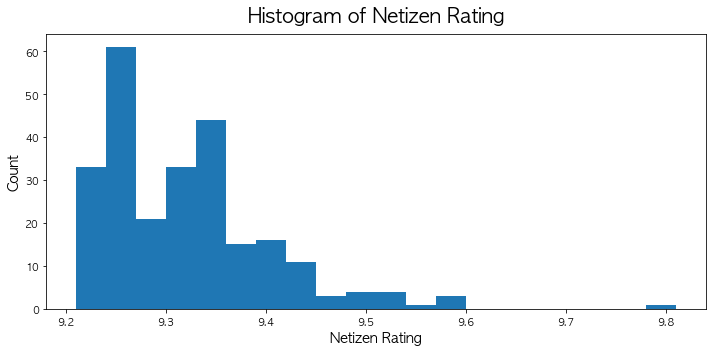

In [8]:
plt.figure(figsize=(10, 5))
plt.hist(df_score, bins=20)
plt.xlabel('Netizen Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Histogram of Netizen Rating', size=20, y=1.02) # y 값이 증가할수록 title이 위쪽으로 배치
plt.tight_layout() # 패딩 조절. tight_layout()의 기본값 : pad=1.08, h_pad=None, w_pad=None, rect=None
plt.draw()

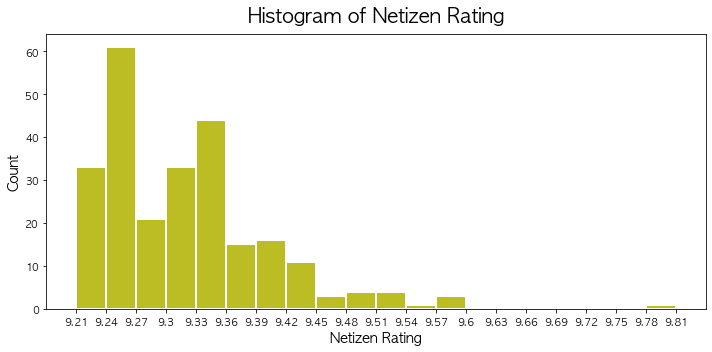

In [10]:
# colors link = https://matplotlib.org/3.5.0/tutorials/colors/colors.html

plt.figure(figsize=(10, 5))
hist = plt.hist(df_score, bins=20, linewidth=2, edgecolor='white', color='tab:olive')
plt.xticks(hist[1], hist[1].astype(float).round(2))
plt.xlabel('Netizen Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Histogram of Netizen Rating', size=20, y=1.02)
plt.tight_layout()
plt.draw()

In [11]:
hist[1]
hist[1].astype(float).round(2)
hist

(array([33., 61., 21., 33., 44., 15., 16., 11.,  3.,  4.,  4.,  1.,  3.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([9.21, 9.24, 9.270000000000001, 9.3, 9.33, 9.360000000000001, 9.39,
        9.42, 9.450000000000001, 9.48, 9.510000000000002,
        9.540000000000001, 9.57, 9.600000000000001, 9.63, 9.66,
        9.690000000000001, 9.72, 9.75, 9.780000000000001, 9.81],
       dtype=object),
 <BarContainer object of 20 artists>)

In [12]:
# Nan 값 다루기
# df['score_netizen'].isna().sum()
df['score_critic'].isna().sum()

109

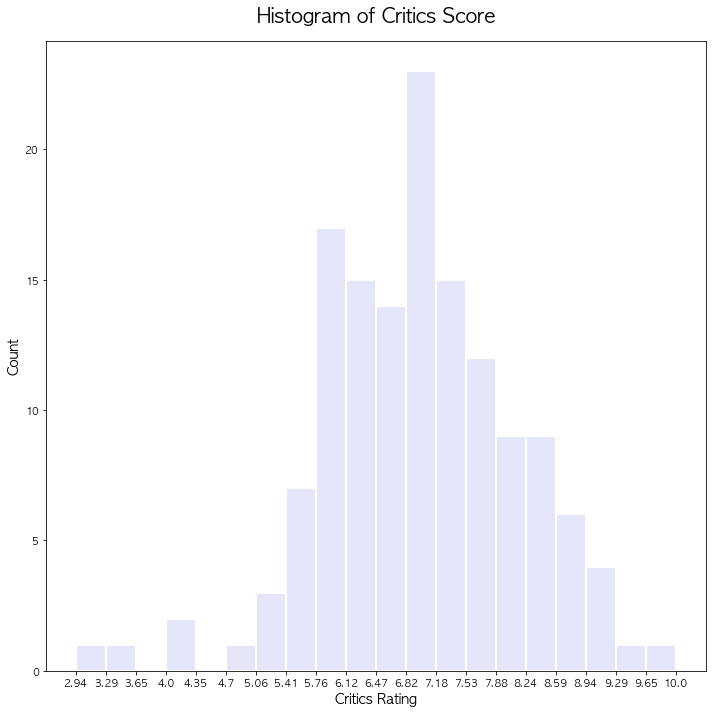

In [13]:
df_score = df['score_critic']

plt.figure(figsize=(10, 10))
hist = plt.hist(df_score[~np.isnan(df_score)], bins=20, linewidth=2, edgecolor='white', color='lavender')
plt.xticks(hist[1], hist[1].astype(float).round(2))
# plt.yticks(np.arange(0,65,5))
plt.xlabel('Critics Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Histogram of Critics Score', size=20, y=1.02)
plt.tight_layout()
plt.draw()

### Bar Chart

In [14]:
df_genre = df.explode('genre')
# df_genre.head(3)

In [15]:
sr_counts = df_genre['genre'].value_counts()
print(len(sr_counts))
sr_counts

19


드라마       137
액션         57
애니메이션      52
코미디        52
모험         49
가족         45
멜로/로맨스     35
판타지        33
SF         22
다큐멘터리      19
범죄         16
스릴러        15
전쟁         12
뮤지컬        12
미스터리        8
공연실황        6
공포          4
서부          3
서사          1
Name: genre, dtype: int64

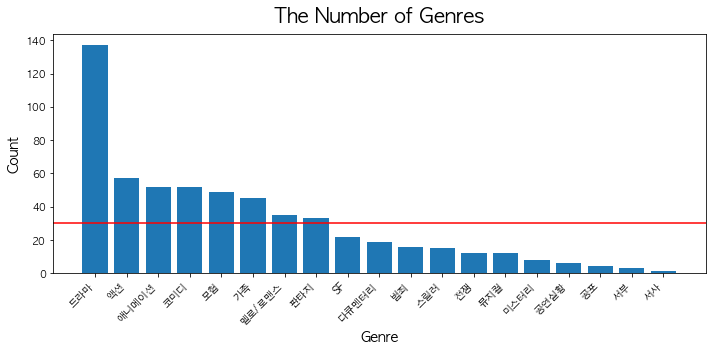

In [17]:
plt.figure(figsize=(10, 5))
plt.bar(range(19), sr_counts)
plt.axhline(sr_counts.mean(), color='red')
# plt.axvline(5, color='yellow')
plt.xticks(range(19), sr_counts.index, rotation=45, ha='right')
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('The Number of Genres', size=20, y=1.02)
plt.tight_layout()
plt.draw()

### Line Chart

In [28]:
sr_count_by_time = df.groupby(df['day_opening'].dt.year).count()['id_movie']
sr_count_by_time.index = sr_count_by_time.index.astype(int)
# sr_count_by_time = pd.Series([sr_count_by_time.loc[year] if year in sr_count_by_time.index else 0 for year in range(1954, 2023)], index=range(1954, 2023))
# sr_count_by_time

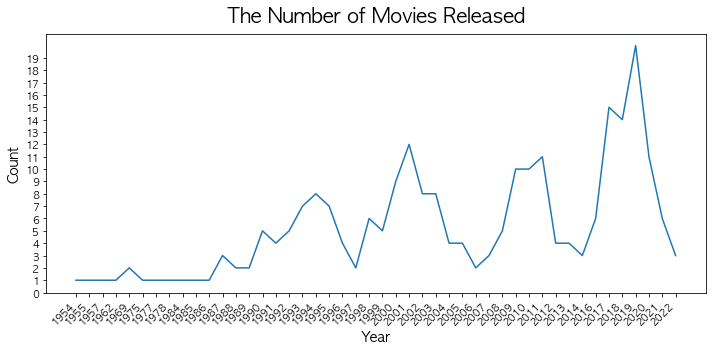

In [29]:
plt.figure(figsize=(10, 5))
plt.plot(range(len(sr_count_by_time.index)), sr_count_by_time)
plt.xticks(range(len(sr_count_by_time.index)), sr_count_by_time.index, rotation=45, ha='right')
plt.yticks(range(sr_count_by_time.max()), range(sr_count_by_time.max()))
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('The Number of Movies Released', size=20, y=1.02)
plt.tight_layout()
plt.draw()

In [30]:
sr_count_by_time = df.groupby(df['day_opening'].dt.year).count()['id_movie']
sr_count_by_time.index = sr_count_by_time.index.astype(int)
sr_count_all_time = pd.Series([sr_count_by_time.loc[year] if year in sr_count_by_time.index else 0 for year in range(1954, 2023)], index=range(1954, 2023))

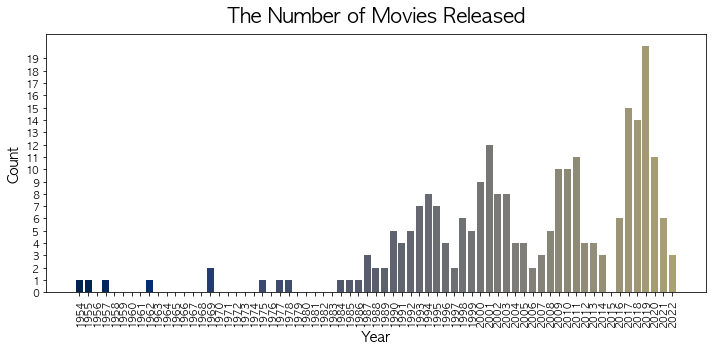

In [31]:
color = cm.cividis(np.linspace(0, 1, 100)) # https://matplotlib.org/stable/tutorials/colors/colormaps.html
plt.figure(figsize=(10, 5))
plt.bar(range(len(sr_count_all_time.index)), sr_count_all_time, color=color)
plt.xticks(range(len(sr_count_all_time.index)), sr_count_all_time.index, rotation=90, ha='center')
plt.yticks(range(sr_count_all_time.max()), range(sr_count_all_time.max()))
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('The Number of Movies Released', size=20, y=1.02)
plt.tight_layout()
plt.draw()

In [32]:
sr_count_all_time_cumsum = sr_count_all_time.cumsum()

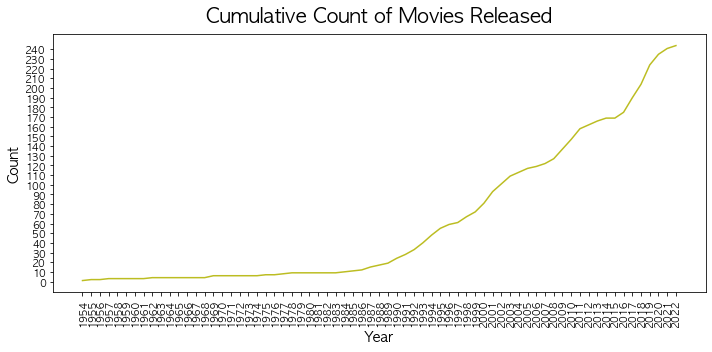

In [33]:
plt.figure(figsize=(10, 5))
plt.plot(range(len(sr_count_all_time_cumsum.index)), sr_count_all_time_cumsum, color='tab:olive')
plt.xticks(range(len(sr_count_all_time_cumsum.index)), sr_count_all_time_cumsum.index, rotation=90, ha='center')
plt.yticks(range(0, sr_count_all_time_cumsum.max(), 10), range(0, sr_count_all_time_cumsum.max(), 10))
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Cumulative Count of Movies Released', size=20, y=1.02)
plt.tight_layout()
plt.draw()

### Area Chart

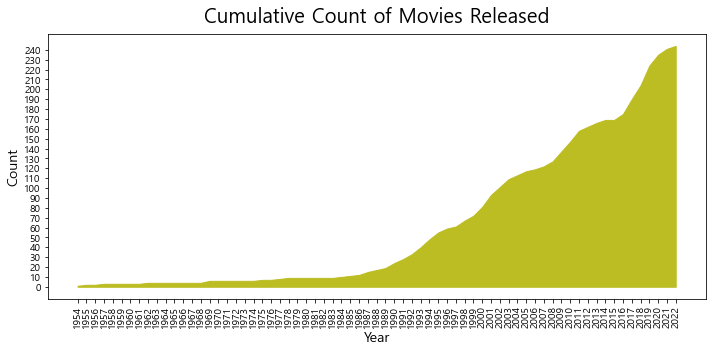

In [55]:
sr_count_by_time = df.groupby(df['day_opening'].dt.year).count()['id_movie']
sr_count_by_time.index = sr_count_by_time.index.astype(int)
sr_count_all_time = pd.Series([sr_count_by_time.loc[year] if year in sr_count_by_time.index else 0 for year in range(1954, 2023)], index=range(1954, 2023))
sr_count_all_time_cumsum = sr_count_all_time.cumsum()

plt.figure(figsize=(10, 5))
plt.fill_between(range(len(sr_count_all_time_cumsum.index)), sr_count_all_time_cumsum, color='tab:olive')
plt.xticks(range(len(sr_count_all_time_cumsum.index)), sr_count_all_time_cumsum.index, rotation=90, ha='center')
plt.yticks(range(0, sr_count_all_time_cumsum.max(), 10), range(0, sr_count_all_time_cumsum.max(), 10))
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Cumulative Count of Movies Released', size=20, y=1.02)
plt.tight_layout()
plt.draw()

### Stacked Area Chart

In [43]:
df_select = df.explode('genre')[['day_opening', 'genre', 'id_movie']]
# df_select
df_pivot = df_select.pivot_table(index=df['day_opening'].dt.year, columns='genre', values='id_movie', aggfunc=lambda x: len(x))
# df_pivot
df_pivot = df_pivot.fillna(0).astype(int)
df_pivot = pd.DataFrame([df_pivot.loc[year].values if year in df_pivot.index else [0] * len(df_pivot.columns) for year in range(1954, 2023)], index=range(1954, 2023), columns=df_pivot.columns) # fill the omitted time stamps
df_pivot.head(3)

genre,SF,가족,공연실황,공포,다큐멘터리,드라마,멜로/로맨스,모험,뮤지컬,미스터리,범죄,서부,스릴러,애니메이션,액션,전쟁,코미디,판타지
1954,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
1955,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0
1956,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


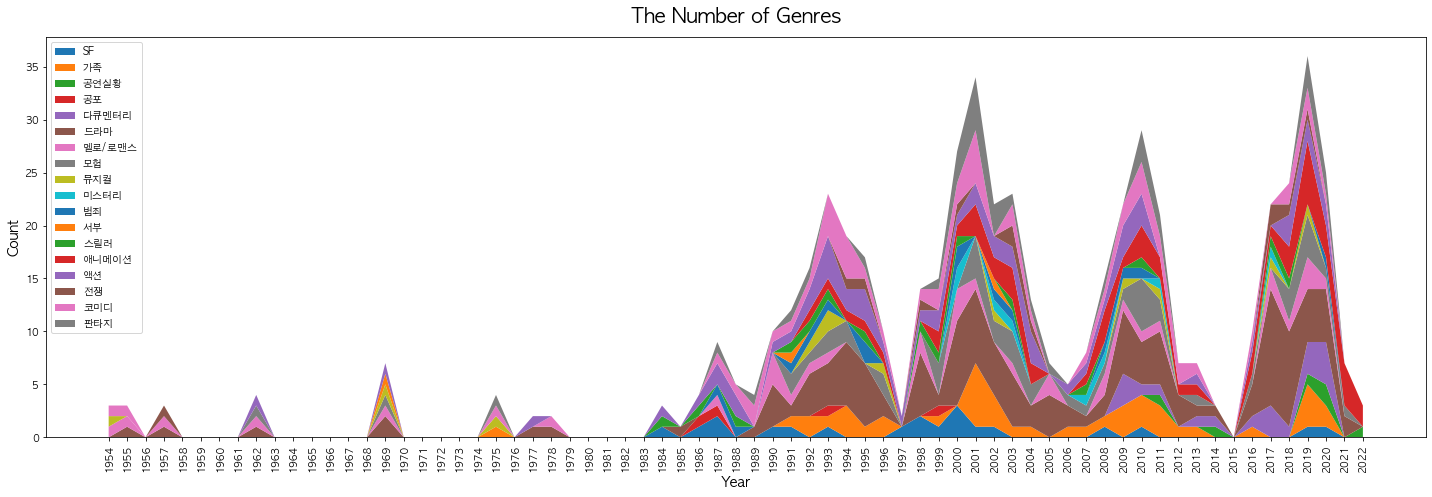

In [46]:
plt.figure(figsize=(20, 7))
plt.stackplot(range(len(df_pivot.index)), df_pivot.T, labels=df_pivot.columns)
plt.xticks(range(len(df_pivot.index)), df_pivot.index, rotation=90, ha='center')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('The Number of Genres', size=20, y=1.02)
plt.legend(loc='upper left')
plt.tight_layout()
plt.draw()

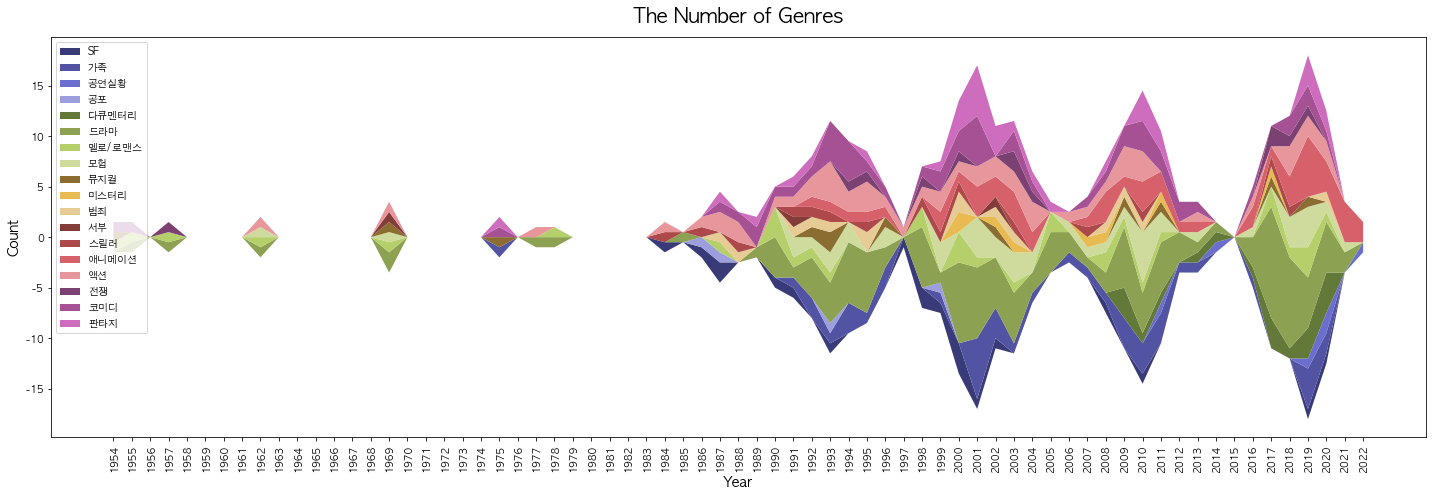

In [49]:
color = cm.tab20b(np.linspace(0, 1, 19))
plt.figure(figsize=(20, 7))
plt.stackplot(range(len(df_pivot.index)), df_pivot.T, baseline='sym', colors=color, labels=df_pivot.columns)
plt.xticks(range(len(df_pivot.index)), df_pivot.index, rotation=90, ha='center')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('The Number of Genres', size=20, y=1.02)
plt.legend(loc='upper left')
plt.tight_layout()
plt.draw()
# plt.savefig('barchart')

In [55]:
grid

array([1954.        , 1954.13627255, 1954.27254509, 1954.40881764,
       1954.54509018, 1954.68136273, 1954.81763527, 1954.95390782,
       1955.09018036, 1955.22645291, 1955.36272545, 1955.498998  ,
       1955.63527054, 1955.77154309, 1955.90781563, 1956.04408818,
       1956.18036072, 1956.31663327, 1956.45290581, 1956.58917836,
       1956.7254509 , 1956.86172345, 1956.99799599, 1957.13426854,
       1957.27054108, 1957.40681363, 1957.54308617, 1957.67935872,
       1957.81563126, 1957.95190381, 1958.08817635, 1958.2244489 ,
       1958.36072144, 1958.49699399, 1958.63326653, 1958.76953908,
       1958.90581162, 1959.04208417, 1959.17835671, 1959.31462926,
       1959.4509018 , 1959.58717435, 1959.72344689, 1959.85971944,
       1959.99599198, 1960.13226453, 1960.26853707, 1960.40480962,
       1960.54108216, 1960.67735471, 1960.81362725, 1960.9498998 ,
       1961.08617234, 1961.22244489, 1961.35871743, 1961.49498998,
       1961.63126253, 1961.76753507, 1961.90380762, 1962.04008

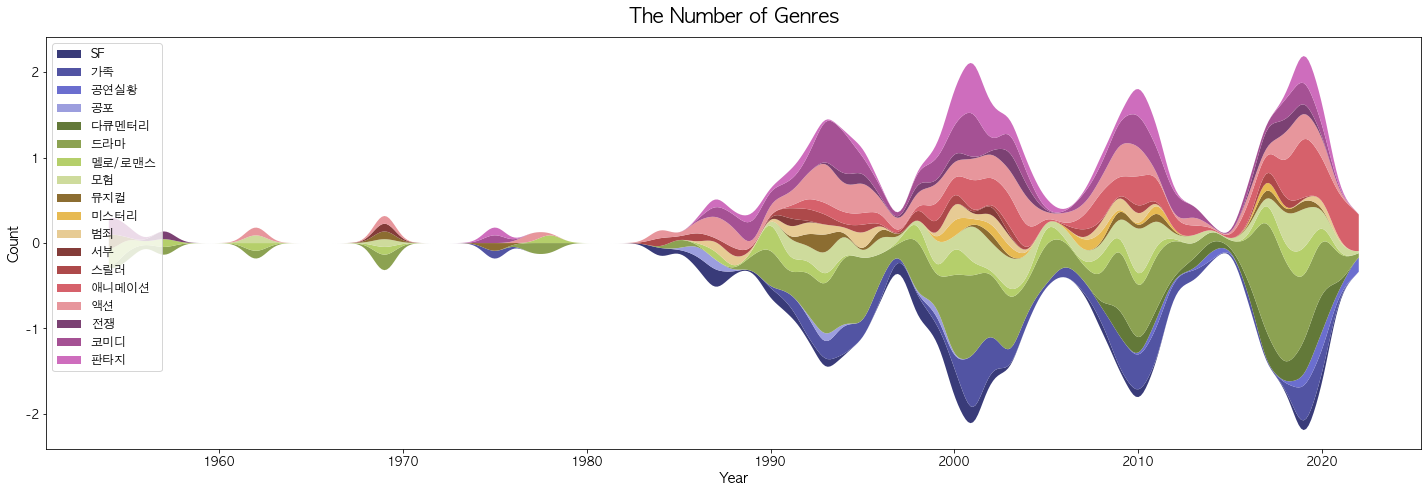

In [68]:
def gaussian_smooth(x, y_, grid, sd):
    weights = np.transpose([stats.norm.pdf(grid, m, sd) for m in x]) # (#grid, N)
    # weights.shape
    weights = weights / weights.sum(0)
    return (weights * y_).sum(1)

df_select = df.explode('genre')[['day_opening', 'genre', 'id_movie']]
df_pivot = df_select.pivot_table(index=df['day_opening'].dt.year, columns='genre', values='id_movie', aggfunc=lambda x: len(x))
df_pivot = df_pivot.fillna(0).astype(int)
grid = np.linspace(1954, 2022, num=500)
y_smoothed = [gaussian_smooth(df_pivot.index, y_, grid, sd=0.6) for y_ in df_pivot.T.to_numpy()]

color = cm.tab20b(np.linspace(0, 1, 19))
plt.figure(figsize=(20, 7))
plt.stackplot(grid, y_smoothed, baseline='sym', colors=color, labels=df_pivot.columns)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('The Number of Genres', size=20, y=1.02)
plt.legend(loc='upper left')
plt.tight_layout()
plt.draw()


### Scatter Plot

In [69]:
df_score = df[['score_netizen', 'score_critic']].dropna()

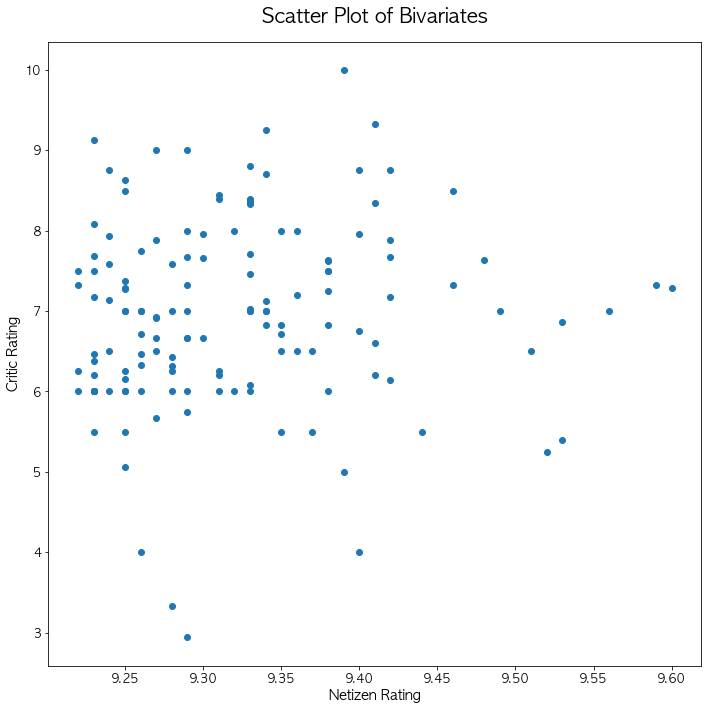

In [70]:
plt.figure(figsize=(10, 10))
plt.scatter(df_score['score_netizen'], df_score['score_critic'])
plt.xlabel('Netizen Rating', fontsize=14)
plt.ylabel('Critic Rating', fontsize=14)
plt.title('Scatter Plot of Bivariates', size=20, y=1.02)
plt.tight_layout()
plt.draw()

In [145]:
run_time

1      130
3      126
4       82
6      100
7      113
      ... 
239    105
242    107
245    102
246    135
249    127
Name: run_time, Length: 141, dtype: int32

In [146]:
scale_down(scale_up(run_time))

array([130., 126.,  82., 100., 113., 123., 140., 161., 152., 121., 142.,
        91., 104., 134., 120., 142., 194., 104., 110., 116.,  73., 146.,
       136., 102., 127., 196., 121., 128., 181., 132., 128., 119., 110.,
       132., 109.,  95., 108., 103., 163., 141., 118.,  91., 112., 152.,
       180., 126., 110., 118., 112., 126., 118., 102.,  90., 101., 124.,
       100., 131.,  89.,  98., 122., 104., 128.,  87., 108.,  79.,  83.,
       107., 115.,  97., 175., 100., 121.,  90.,  98.,  89., 102., 127.,
        79., 109., 106.,  94., 110.,  95., 135., 117.,  91., 121., 100.,
       125., 111., 101., 107., 103., 120., 125.,  87.,  99., 133., 104.,
       105., 115., 115., 111., 117., 121., 144.,  61., 119., 116., 131.,
       101.,  85., 116., 108.,  70.,  85.,  86., 147., 137.,  84., 120.,
       118.,  98., 106., 138., 129., 222., 139.,  89., 130.,  92., 126.,
        87., 125.,  97.,  95., 105., 107., 102., 135., 127.])

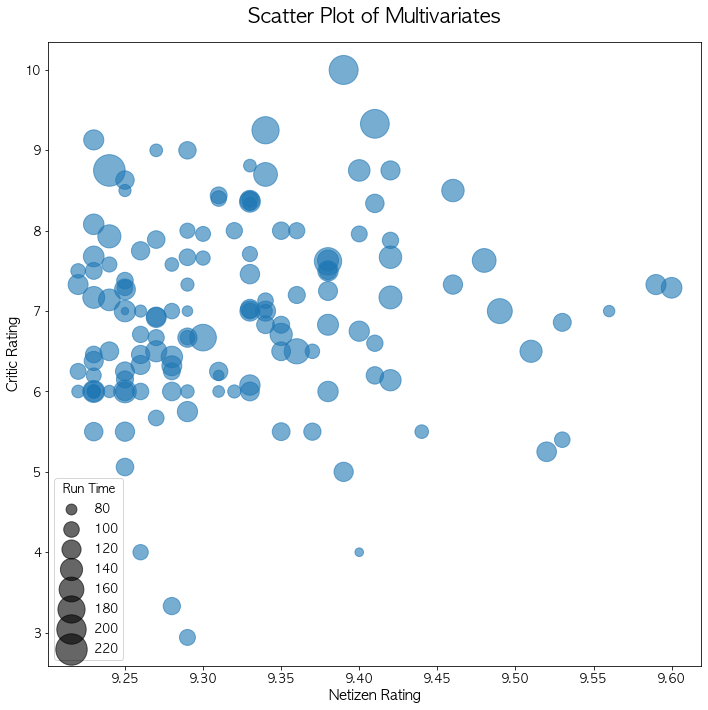

In [144]:
df_score = df[['score_netizen', 'score_critic', 'run_time']].dropna()
run_time = df_score['run_time']
scale_up = lambda scores: preprocessing.minmax_scale(scores) * 1000
scale_down = lambda score: score / 1000 * (run_time.max() - run_time.min()) + run_time.min()

plt.figure(figsize=(10, 10))
scatter = plt.scatter(df_score['score_netizen'], df_score['score_critic'], s=scale_up(run_time), alpha=0.6)
plt.xlabel('Netizen Rating', fontsize=14)
plt.ylabel('Critic Rating', fontsize=14)
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6, func=scale_down)
plt.legend(handles, labels, loc="lower left", title="Run Time")
plt.title('Scatter Plot of Multivariates', size=20, y=1.02)
plt.tight_layout()
plt.draw()

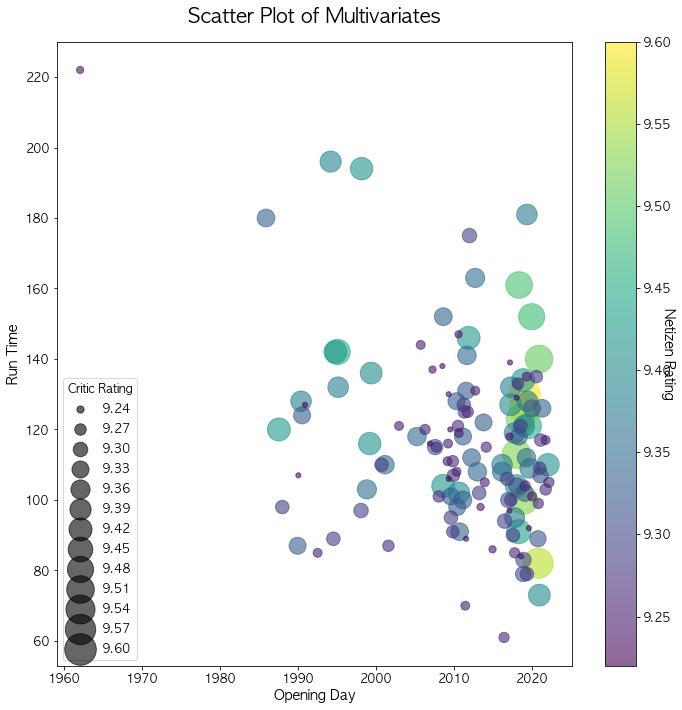

In [98]:
df_score = df[['day_opening', 'score_netizen', 'score_critic', 'run_time']].dropna()
score_netizen = df_score['score_netizen']
score_critic = df_score['score_netizen']
scale_up = lambda scores: preprocessing.minmax_scale(scores) * 1000
scale_down = lambda score: score / 1000 * (score_critic.max() - score_critic.min()) + score_critic.min()

plt.figure(figsize=(10, 10))
scatter = plt.scatter(df_score['day_opening'], df_score['run_time'], s=scale_up(score_critic), c=score_netizen, alpha=0.6)
plt.xlabel('Opening Day', fontsize=14)
plt.ylabel('Run Time', fontsize=14)
cbar = plt.colorbar()
cbar.ax.set_ylabel('Netizen Rating', rotation=270, size=14)
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6, func=scale_down)
plt.legend(handles, labels, loc="lower left", title="Critic Rating")
plt.title('Scatter Plot of Multivariates', size=20, y=1.02)
plt.tight_layout()
plt.draw()

### Heatmap

In [107]:
df_select = df.explode('genre')[['day_opening', 'genre', 'id_movie']]
df_pivot = df_select.pivot_table(index=df['day_opening'].dt.year, columns='genre', values='id_movie', aggfunc=lambda x: len(x))
df_pivot = df_pivot.fillna(0).astype(int)
df_pivot = pd.DataFrame([df_pivot.loc[year].values if year in df_pivot.index else [0] * len(df_pivot.columns) for year in range(1954, 2023)], index=range(1954, 2023), columns=df_pivot.columns) # fill the omitted time stamps
df_pivot = df_pivot.T
df_pivot.head(3)

,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
genre,,,,,,,,,,,,,,,,,,,,,
SF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
가족,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,4,2,0,0
공연실황,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,2,0,1


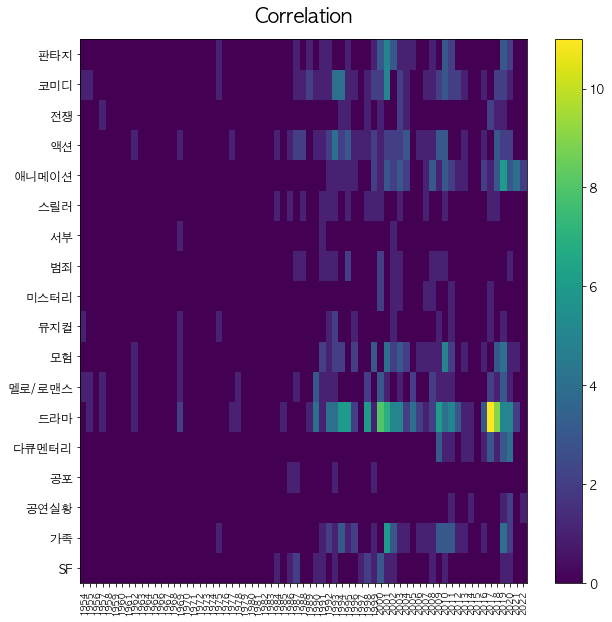

In [115]:
plt.figure(figsize=(10, 10))
plt.pcolor(df_pivot)
plt.xticks(np.arange(0.5, len(df_pivot.columns), 1), df_pivot.columns, rotation=90, ha='center', fontsize=9)
plt.yticks(np.arange(0.5, len(df_pivot.index), 1), df_pivot.index)
plt.title('Correlation', size=20, y=1.02)
plt.colorbar()
plt.draw()

In [116]:
df_corr = df_hotel[['rating_hc', 'rating_ta', 'rating_bk', 'star', 'price_total']].dropna().astype(float).corr()

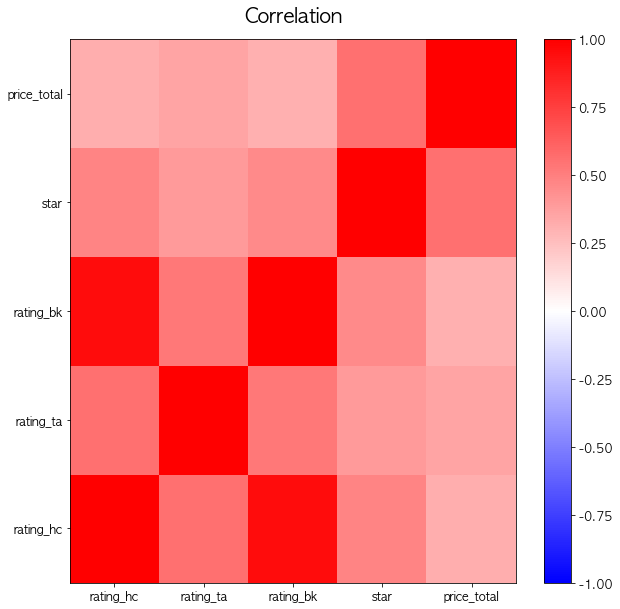

In [118]:
plt.figure(figsize=(10, 10))
plt.pcolor(df_corr, vmin = -1, vmax = 1, cmap = 'bwr') # https://matplotlib.org/stable/tutorials/colors/colormaps.html
plt.xticks(np.arange(0.5, len(df_corr.columns), 1), df_corr.columns)
plt.yticks(np.arange(0.5, len(df_corr.index), 1), df_corr.index)
plt.title('Correlation', size=20, y=1.02)
plt.colorbar()
plt.draw()

### Hexbin

In [ ]:
df_star_price = df_hotel[['rating_bk', 'rating_hc']].dropna().astype(float)

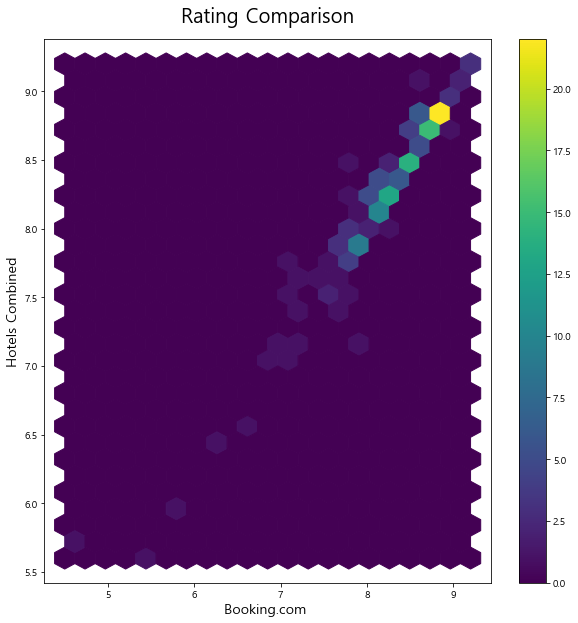

In [62]:
plt.figure(figsize=(10, 10))
plt.hexbin(df_star_price['rating_bk'], df_star_price['rating_hc'], gridsize=(20, 15))
plt.xlabel('Booking.com ', fontsize=14)
plt.ylabel('Hotels Combined', fontsize=14)
plt.title('Rating Comparison', size=20, y=1.02)
plt.colorbar()
plt.draw()

### KDE (Kernel Density Estimate)

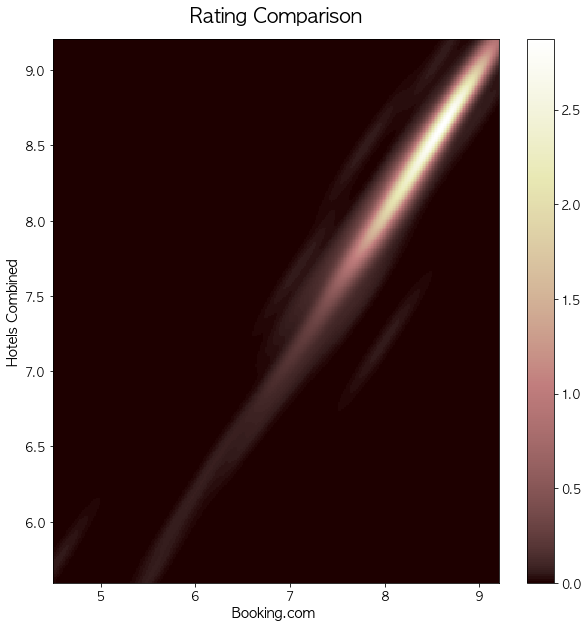

In [130]:
df_star_price = df_hotel[['rating_bk', 'rating_hc']].dropna().astype(float)
x = df_star_price['rating_bk']
y = df_star_price['rating_hc']
nbins=300
k = stats.kde.gaussian_kde([x, y])
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

plt.figure(figsize=(10, 10))
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto', cmap='pink')
plt.xlabel('Booking.com ', fontsize=14)
plt.ylabel('Hotels Combined', fontsize=14)
plt.title('Rating Comparison', size=20, y=1.02)
plt.colorbar()
plt.draw()

### Radar Chart

In [151]:
df_rating = df_hotel[['name', 'rating_hc', 'rating_bk', 'rating_ta']].dropna().reset_index(drop=True).sample(3)
list_category = ['rating_hc', 'rating_bk', 'rating_ta']
list_category = [*list_category, list_category[0]]
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(list_category))
df_rating

,name,rating_hc,rating_bk,rating_ta
81,이비스 스타일 앰배서더 강남,8.0,7.9,9.0
31,신라스테이 구로,8.1,8.0,9.0
84,해밀톤 호텔,8.1,8.1,7.0


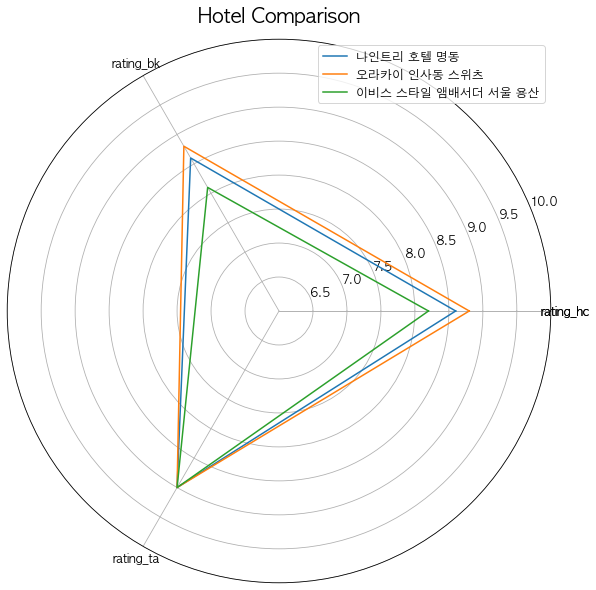

In [150]:
plt.figure(figsize=(10, 10))
plt.subplot(polar=True)
for i, row in df_rating.iterrows():
    plt.plot(label_loc, row[list_category].to_list(), label=row['name'])
plt.ylim(6, 10)
plt.title('Hotel Comparison', size=20, y=1.02)
plt.thetagrids(np.degrees(label_loc), labels=list_category)
plt.legend()
plt.draw()

### Pie Chart

In [180]:
sr_nation = df.explode('nation')['nation'].value_counts()
others = sr_nation[9:].sum()
sr_nation = pd.concat([sr_nation[:9], pd.Series(others, index=['기타'])])
sr_nation

미국      129
한국       62
영국       20
일본       18
프랑스      13
홍콩       11
이탈리아      8
중국        6
독일        5
기타       29
dtype: int64

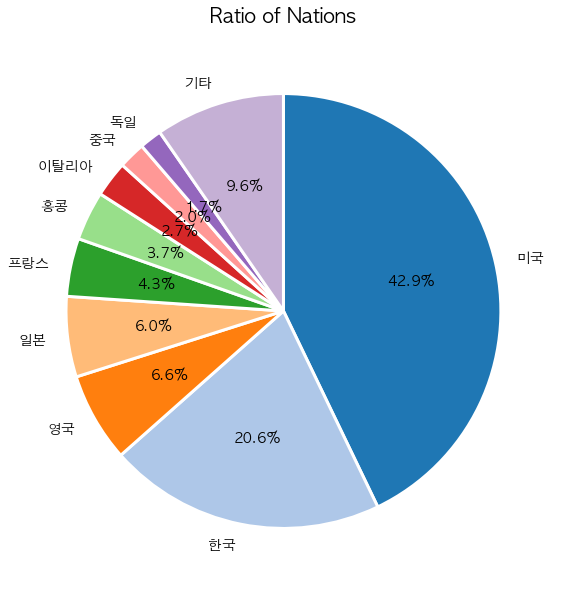

In [177]:
color = cm.tab20.colors
plt.figure(figsize=(10, 10), facecolor='white')
plt.pie(sr_nation, labels=sr_nation.index, labeldistance=1.1, wedgeprops={'linewidth': 3, 'edgecolor': 'white'},
        textprops={'size': 14}, autopct='%.1f%%', startangle=90, counterclock=False, colors=color)
plt.title('Ratio of Nations', size=20, y=1.02)
plt.draw()

### Donut Chart

In [179]:
sr_nation = df.explode('nation')['nation'].value_counts()
others = sr_nation[9:].sum()
sr_nation = pd.concat([sr_nation[:9], pd.Series(others, index=['기타'])])

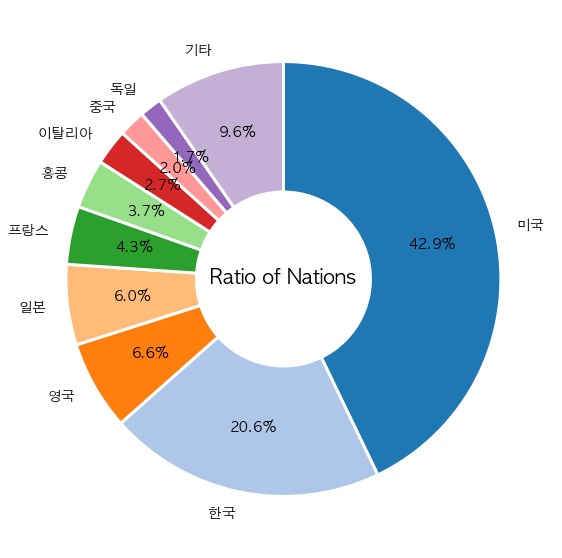

In [184]:
color = cm.tab20.colors
plt.figure(figsize=(10, 10), facecolor='white')
plt.pie(sr_nation, labels=sr_nation.index, labeldistance=1.1, wedgeprops={'linewidth': 3, 'edgecolor': 'white', 'width': 0.6},
        textprops={'size': 14}, autopct='%.1f%%', pctdistance=0.7, startangle=90, counterclock=False, colors=color)
plt.title('Ratio of Nations', size=20, y=0.48)
plt.draw()

### Venn Diagram

In [188]:
df_genre = df.explode('genre')[['title_kor', 'genre']].groupby('genre').agg(lambda x: set(x.to_list()))
genre_selection = ['멜로/로맨스', '코미디']
# df_genre

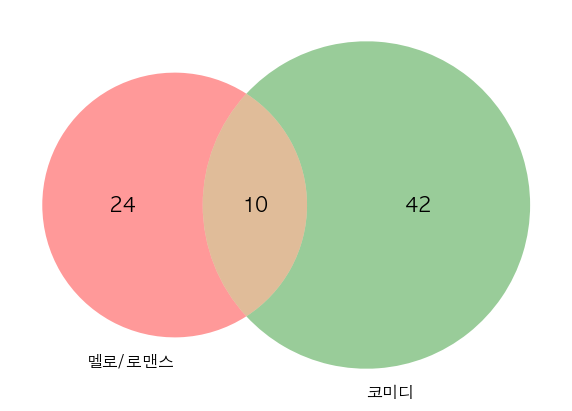

In [201]:
plt.figure(figsize=(10, 10), facecolor='white')
out = venn.venn2(df_genre.loc[genre_selection, 'title_kor'].to_list(), genre_selection)
for text in out.set_labels:
    text.set_fontsize(16)
for text in out.subset_labels:
    text.set_fontsize(20)
plt.draw()

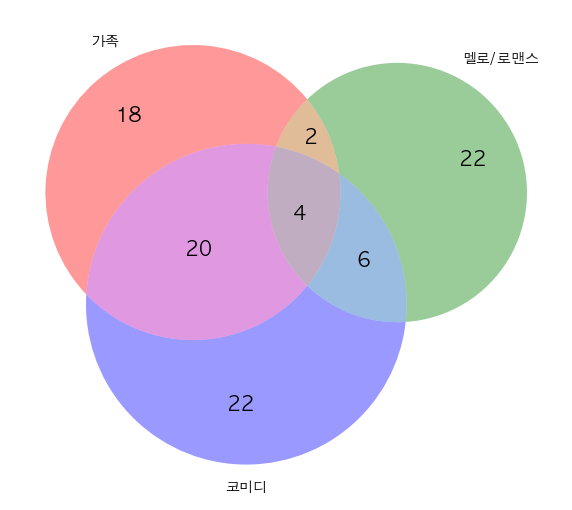

In [207]:
df_genre = df.explode('genre')[['title_kor', 'genre']].groupby('genre').agg(lambda x: set(x.to_list()))
genre_selection = ['가족', '멜로/로맨스', '코미디']

plt.figure(figsize=(10, 10), facecolor='white')
out = venn.venn3(df_genre.loc[genre_selection, 'title_kor'].to_list(), genre_selection)
for text in out.set_labels:
    text.set_fontsize(14)
for text in out.subset_labels:
    text.set_fontsize(20)
plt.draw()

### Box Plot & Violin Plot

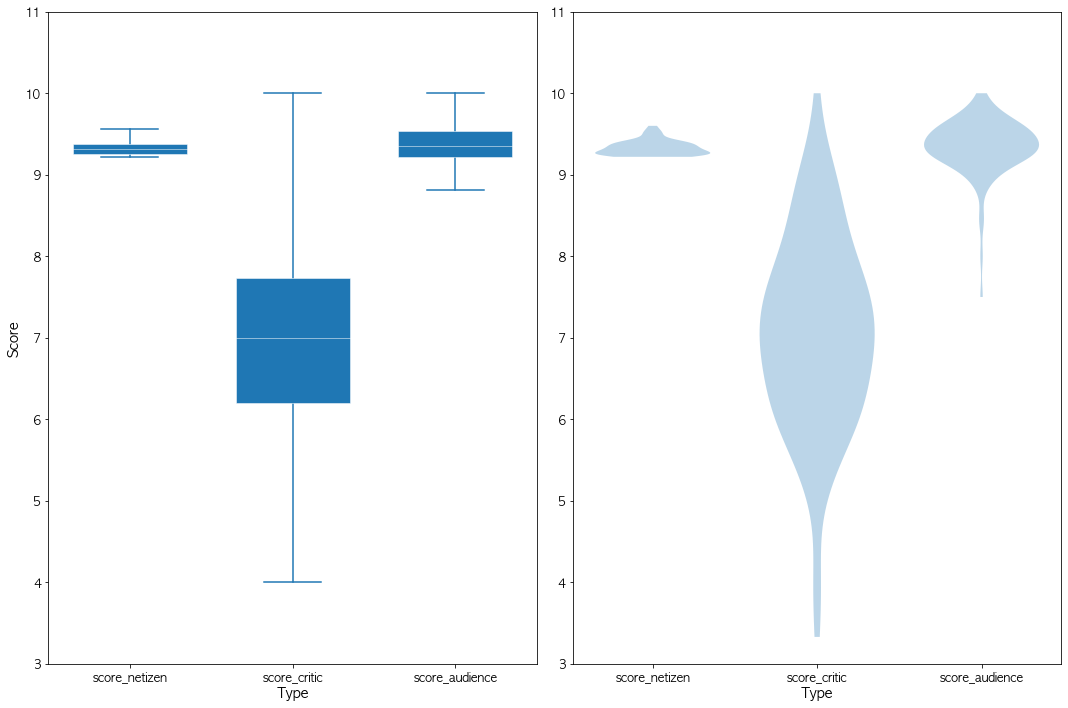

In [223]:
df_score = df[['score_netizen', 'score_critic', 'score_audience']].dropna()
df_score = df_score.astype(float)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
# plt.boxplot(df_score.to_numpy())
plt.boxplot(df_score.to_numpy(), positions=[0, 1, 2], widths=0.7, patch_artist=True,
                showmeans=False, showfliers=False,
                medianprops={"color": "white", "linewidth": 0.5},
                boxprops={"facecolor": "C0", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C0", "linewidth": 1.5},
                capprops={"color": "C0", "linewidth": 1.5})
plt.xticks(range(3), df_score.columns)
plt.xlabel('Type', fontsize=14)
plt.ylim(3, 11)
plt.ylabel('Score', fontsize=14)
plt.subplot(1, 2, 2)
plt.violinplot(df_score.to_numpy(), positions=[0, 1, 2], widths=0.7,
                showmeans=False, showmedians=False, showextrema=False)
plt.xticks(range(3), df_score.columns)
plt.xlabel('Type', fontsize=14)
plt.ylim(3, 11)
# plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.draw()

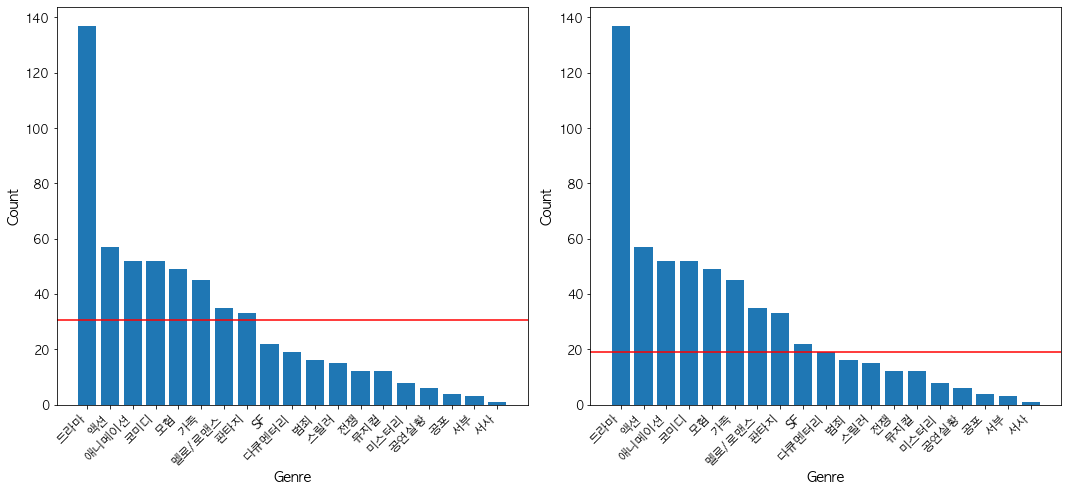

In [225]:
# multi subplots
df_genre = df.explode('genre')
sr_counts = df_genre['genre'].value_counts()

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.bar(range(19), sr_counts)
plt.axhline(sr_counts.mean(), color='red')
plt.xticks(range(19), sr_counts.index, rotation=45, ha='right')
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.subplot(1, 2, 2)
plt.bar(range(19), sr_counts)
plt.axhline(sr_counts.median(), color='red')
plt.xticks(range(19), sr_counts.index, rotation=45, ha='right')
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.draw()

### Word Cloud

In [138]:
noun_extractor = LRNounExtractor_v2()
nouns = noun_extractor.train_extract(df_comment['comment'])
comments = ' '.join(nouns)
# comments

[Noun Extractor] use default predictors
[Noun Extractor] num features: pos=3929, neg=2321, common=107
[Noun Extractor] counting eojeols
[EojeolCounter] n eojeol = 39499 from 7500 sents. mem=0.263 Gb                    
[Noun Extractor] complete eojeol counter -> lr graph
[Noun Extractor] has been trained. #eojeols=88072, mem=0.283 Gb
[Noun Extractor] batch prediction was completed for 12567 words
[Noun Extractor] checked compounds. discovered 2768 compounds
[Noun Extractor] postprocessing detaching_features : 6246 -> 5377
[Noun Extractor] postprocessing ignore_features : 5377 -> 5290
[Noun Extractor] postprocessing ignore_NJ : 5290 -> 5245
[Noun Extractor] 5245 nouns (2768 compounds) with min frequency=1
[Noun Extractor] flushing was done. mem=0.296 Gb                    
[Noun Extractor] 58.18 % eojeols are covered


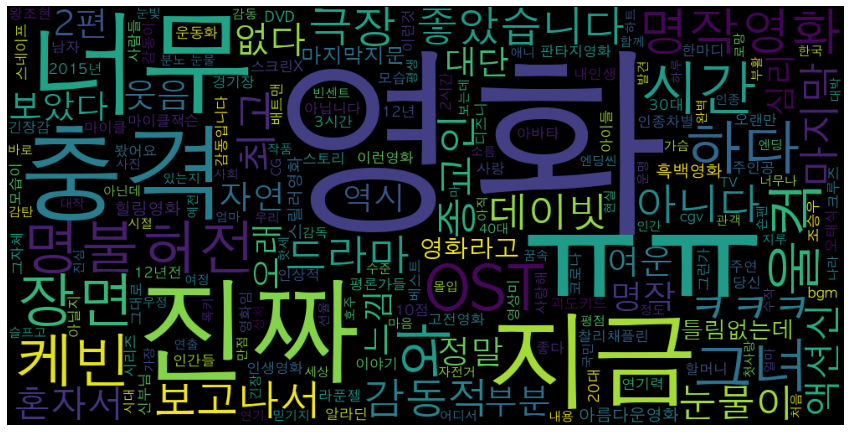

In [140]:
wordcloud = WordCloud(
    font_path = font_path,
    background_color = 'black',
    stopwords = ['영화입니다','영화였습니다'],
    width = 1000, height = 500).generate(comments)
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.draw()

### Tree Map

In [51]:
df_genre = pd.DataFrame(df.explode('genre').groupby('genre').count()['id_movie'])
df_genre

,id_movie
genre,
SF,22
가족,45
공연실황,6
공포,4
다큐멘터리,19
드라마,137
멜로/로맨스,35
모험,49
뮤지컬,12


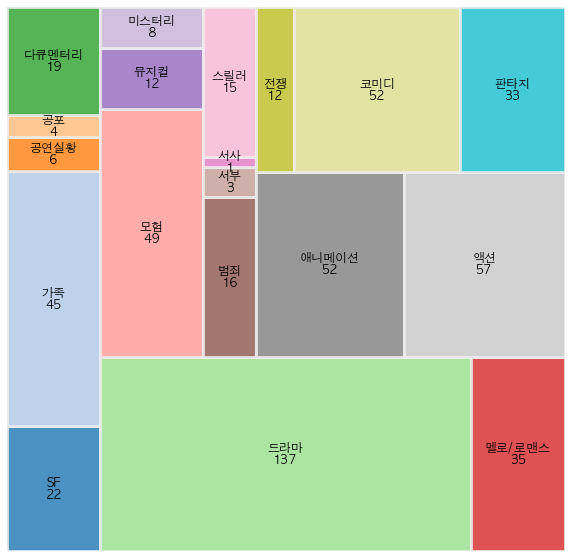

In [52]:
# color = [np.random.choice(np.linspace(0, 1, 18), 3) for i in range(18)]
color = cm.tab20.colors
plt.figure(figsize=(10, 10))
plt.rcParams['font.size'] = 12
squarify.plot(sizes=df_genre['id_movie'],
              label=df_genre.index, value=df_genre['id_movie'],
              bar_kwargs=dict(linewidth=3, edgecolor="#eee"),
              alpha=0.8, color=color)
plt.axis('off')
plt.draw()